<a href="https://colab.research.google.com/github/Pogba666/DeepLearning/blob/main/Age_Gender_Detection_UTKFace_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder = "drive/My Drive/Face_data_based_ml/UTKFace"

In [ ]:
import os
files = os.listdir(folder)

In [ ]:
import cv2
ages=[]
genders=[]
images=[]

for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  total=folder+'/'+fle
  print(total)
  image=cv2.imread(total)

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(48,48))
  images.append(image)

drive/My Drive/Face_data_based_ml/UTKFace/15_0_4_20170103233214059.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/15_0_4_20170110232416743.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/15_0_4_20170103201013615.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/15_0_2_20170104013327250.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/15_0_3_20170104225537649.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/15_0_2_20170116181405111.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/15_0_3_20170104225254497.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/15_1_0_20170103201148510.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/15_0_3_20170104230418059.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/15_0_3_20170104225906465.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/15_1_0_20170104013418578.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/15_0_2_20170102235056163.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFac

In [ ]:
for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  ages.append(age)
  genders.append(gender)

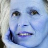

80
1


In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(images[24])
print(ages[24])
print(genders[24])

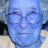

80
1


In [ ]:
cv2_imshow(images[53])
print(ages[53])
print(genders[53])

In [ ]:
import numpy as np
images_f=np.array(images)
genders_f=np.array(genders)
ages_f=np.array(ages)

In [ ]:
np.save(folder+'image.npy',images_f)
np.save(folder+'gender.npy',genders_f)
np.save(folder+'age.npy',ages_f)

In [ ]:
values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[12391 11317]


In [ ]:
values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [ ]:
val=values.tolist()
cnt=counts.tolist()

In [ ]:
labels=[]

i=0
while i<len(ages):
  label=[]
  label.append([ages[i]])
  label.append([genders[i]])
  labels.append(label)
  i+=1

In [ ]:
images_f_2=images_f/255

In [ ]:
labels_f=np.array(labels)

In [ ]:
images_f_2.shape

(23708, 48, 48, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_f,test_size=0.20)

In [ ]:
Y_train[0:5]

array([[[29],
        [ 0]],

       [[ 1],
        [ 0]],

       [[39],
        [ 0]],

       [[34],
        [ 0]],

       [[36],
        [ 0]]])

In [ ]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [ ]:
Y_train_2[0][0:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
Y_train_2[1][0:5]

array([[29],
       [ 1],
       [39],
       [34],
       [36]])

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x

def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten= Flatten() (maxp_4)
  dense_1= Dense(64,activation='relu')(flatten)
  dense_2= Dense(64,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  drop_2=Dropout(0.2)(dense_2)
  output_1= Dense(1,activation="sigmoid",name='sex_out')(drop_1)
  output_2= Dense(1,activation="relu",name='age_out')(drop_2)
  model = Model(inputs=[inputs], outputs=[output_1,output_2])
  model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",
	metrics=["accuracy"])
  
  return model

In [ ]:
Model=model((48,48,3))

In [ ]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 48, 48, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 48, 48, 32)   0           dropout[0][0]                    
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [ ]:
fle_s='Age_sex_detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [ ]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=5,callbacks=[callback_list])

Epoch 1/5
297/297 [==============================] - 155s 522ms/step - loss: 16.0145 - sex_out_loss: 0.6525 - age_out_loss: 15.1773 - sex_out_accuracy: 0.6105 - age_out_accuracy: 0.0471 - val_loss: 16.4575 - val_sex_out_loss: 0.6037 - val_age_out_loss: 15.6629 - val_sex_out_accuracy: 0.6708 - val_age_out_accuracy: 0.0485

Epoch 00001: val_loss improved from inf to 16.45749, saving model to Age_sex_detection.h5
Epoch 2/5
297/297 [==============================] - 155s 522ms/step - loss: 12.4612 - sex_out_loss: 0.5581 - age_out_loss: 11.6818 - sex_out_accuracy: 0.7191 - age_out_accuracy: 0.0454 - val_loss: 15.7195 - val_sex_out_loss: 0.5520 - val_age_out_loss: 14.9187 - val_sex_out_accuracy: 0.7604 - val_age_out_accuracy: 0.0453

Epoch 00002: val_loss improved from 16.45749 to 15.71955, saving model to Age_sex_detection.h5
Epoch 3/5
297/297 [==============================] - 155s 524ms/step - loss: 10.8544 - sex_out_loss: 0.4993 - age_out_loss: 10.0871 - sex_out_accuracy: 0.7608 - age_ou

In [ ]:
Model.evaluate(X_test,Y_test_2)

149/149 [==============================] - 8s 55ms/step - loss: 11.0480 - sex_out_loss: 0.3985 - age_out_loss: 10.3091 - sex_out_accuracy: 0.8248 - age_out_accuracy: 0.0439


[11.048016548156738,
 0.39850959181785583,
 10.309051513671875,
 0.82475745677948,
 0.04386334866285324]

In [ ]:
pred=Model.predict(X_test)

In [ ]:
pred[1]

array([[37.79607   ],
       [38.65437   ],
       [17.754019  ],
       ...,
       [34.08627   ],
       [ 0.21878995],
       [13.455658  ]], dtype=float32)

In [ ]:
def test_image(ind,images_f,images_f_2,Model):
  cv2_imshow(images_f[ind])
  image_test=images_f_2[ind]
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  sex_f=['Male','Female']
  age=int(np.round(pred_1[1][0]))
  sex=int(np.round(pred_1[0][0]))
  print("Predicted Age: "+ str(age))
  print("Predicted Sex: "+ sex_f[sex])

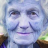

Predicted Age: 66
Predicted Sex: Male


In [ ]:
test_image(57,images_f,images_f_2,Model)

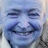

Predicted Age: 56
Predicted Sex: Male


In [ ]:
test_image(137,images_f,images_f_2,Model)

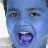

Predicted Age: 2
Predicted Sex: Male


In [ ]:
test_image(502,images_f,images_f_2,Model)

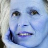

Predicted Age: 28
Predicted Sex: Male


In [ ]:
test_image(24,images_f,images_f_2,Model)